# **Customer Churn Analysis and Preiction**

---



*   **Customer churn is the percentage of customers that stopped using any company's product or service.**

*   In this task i have taken a churn dataset to create an end-to-end machine learning solution for predicting customer churn in the telecom industry.

*   By understanding the factors that contribute to churn the organization can improve their services or products.

*   By identifying the specific group of people that stopped using company's product or service, the organization can implement multiple marketing stratigy on these costumers so they do not churn.

# Importing Libraries

In [515]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Data Preprocessing

## Loading and Understanding data

In [516]:
df = pd.read_csv('Churn_Modelling.csv')

In [517]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [519]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [520]:
#checking for null values

df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## **Dataset Analysis(EDA)**

In [521]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

***Dropping the columns that do not add ant value to our result***






In [522]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [523]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


***Distribution of Customer Churn in different Geographies***

In [524]:
df.groupby('Geography')['Exited'].value_counts(normalize=True).mul(100)

Geography  Exited
France     0         83.845233
           1         16.154767
Germany    0         67.556796
           1         32.443204
Spain      0         83.326605
           1         16.673395
Name: Exited, dtype: float64

<Axes: xlabel='Geography', ylabel='count'>

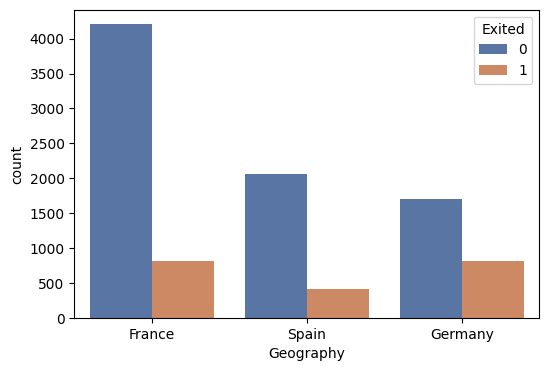

In [525]:
plt.figure(figsize= (6,4))
sns.countplot(x='Geography', hue = 'Exited',data = df)

**Key finding**
* France holds the highest numbers of customer
* France and spain have churn rate of 16%.
* Germany has the highest churn rate of 32% the organization should provide any special offers or services or any other marketing stratigy to decrease this percentage.

***Distribution of Customer Churn in different Gender***

In [526]:
df.groupby('Gender')['Exited'].value_counts(normalize=True).mul(100)

Gender  Exited
Female  0         74.928461
        1         25.071539
Male    0         83.544072
        1         16.455928
Name: Exited, dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

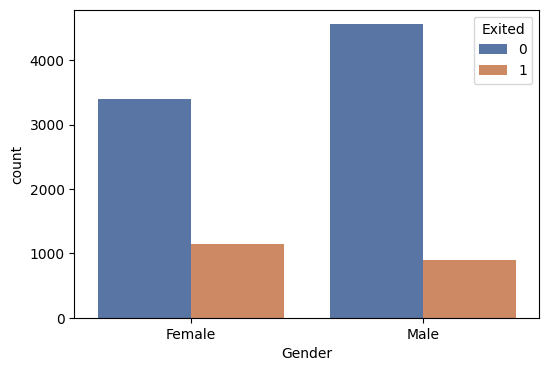

In [527]:
plt.figure(figsize= (6,4))
sns.countplot(x='Gender', hue = 'Exited',data = df)

**Key finding**
* Female have higher churn rate of 25%

***Distribution of Credit Score***

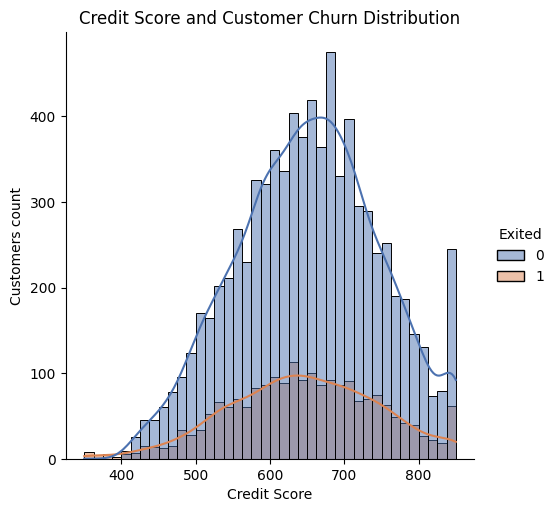

In [528]:
palette = "deep"
sns.set_palette(palette)

sns.displot(data=df, x='CreditScore',hue='Exited', kde=True,bins=40)

plt.xlabel('Credit Score')
plt.ylabel('Customers count')
plt.title('Credit Score and Customer Churn Distribution')

plt.show()

**Key finding**

*  All the customers who have credit score less than 400 have churned, So the company should not provide services to these people.

***Finding categorical variable***

In [529]:
df.select_dtypes(include='object')

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


## Encoding Categorical variables

In [530]:
df = pd.get_dummies(data=df, drop_first=True)

In [531]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Normalization

In [532]:
large_columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
scaler = MinMaxScaler()
df[large_columns] = scaler.fit_transform(df[large_columns])

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0


***Checking the dataset is balanced or not***

In [533]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

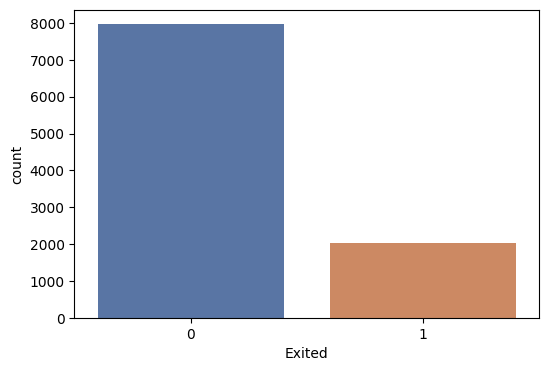

In [534]:
plt.figure(figsize= (6,4))
sns.countplot(data=df, x = 'Exited')

**Key finding**
* The Exited column is highly imbalanced as 80% of numbers are 0
and only 20% of numbers are 1
* That is a good thing for any organization but should always try to decrease it.

# Before Balancing target or independent variable

## Splitting Data

In [535]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [557]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 7963, 1: 2037})


In [536]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

# Building Models and Training

## Logistic Regression

In [541]:
Lg_clf = LogisticRegression()

Lg_clf.fit(X_train,y_train)

y_pred = Lg_clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.58      0.21      0.31       407

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.60      2000
weighted avg       0.78      0.81      0.77      2000



## DecisionTreeClassifier

In [542]:
Dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

Dt_clf.fit(X_train,y_train)

y_pred = Dt_clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1593
           1       0.53      0.52      0.52       407

    accuracy                           0.81      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.81      0.81      0.81      2000



## Random Forest classifier

In [543]:
Rf_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

Rf_clf.fit(X_train,y_train)

y_pred = Rf_clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.76      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



## XGBoost Classifier

In [544]:
Xgb_clf = XGBClassifier()

Xgb_clf.fit(X_train,y_train)

y_pred = Xgb_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))

[[1506   87]
 [ 213  194]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.69      0.48      0.56       407

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



# After Balancing dataset by Over Sampling SMOTE

In [545]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [556]:
from collections import Counter
counter = Counter(y_res)
print(counter)

Counter({1: 7963, 0: 7963})


## Splitting Data

In [546]:
X_train,X_test,y_train,y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 0)

# Building Models and Training

## Logistic Regression

In [550]:
Lg_clf = LogisticRegression()

Lg_clf.fit(X_train,y_train)

y_pred = Lg_clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1590
           1       0.72      0.71      0.71      1596

    accuracy                           0.72      3186
   macro avg       0.72      0.72      0.72      3186
weighted avg       0.72      0.72      0.72      3186



## DecisionTreeClassifier

In [551]:
Dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

Dt_clf.fit(X_train,y_train)

y_pred = Dt_clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1590
           1       0.81      0.84      0.82      1596

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



## Random Forest classifier

In [552]:
Rf_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

Rf_clf.fit(X_train,y_train)

y_pred = Rf_clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1590
           1       0.89      0.86      0.88      1596

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186



## XGBoost Classifier

In [553]:
Xgb_clf = XGBClassifier()

Xgb_clf.fit(X_train,y_train)

y_pred = Xgb_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))

[[1465  125]
 [ 183 1413]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1590
           1       0.92      0.89      0.90      1596

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



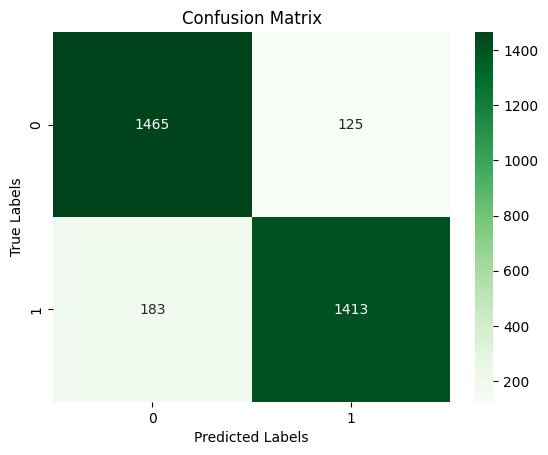

In [554]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

# Summary

* We have seen that **Before Balancing** the dataset we got **85%** accuracy with **Random forest classifier** but there is high difference in precision recall and f1 score which is not good and **less reliable**.


* **After Balancing** the dataset there is some increament in accuracy with **XG Boost classifier** which is **90%** but this time there is negligible difference in precision recall and f1 score which is very good and models are **more reliable**.


# Recommendations for improvement

*  **Target Germany** - Germany has the highest churn rate in all three contries. Analyze the customer base of germany and provide special offerings to them to reduce the churn.

* Use this Model/project to predict the churn of costumers before they churn.

* We got 90% accuracy in this project in predicting so it can help the orgqanization a lot to identify the customers and provide offerings to them.

* **Regularly Monitor** the costumer feedback, churn rates and monitor the effect of your stratigies.

* **Use new data regularly** for continuous improvement in performance of the model.